In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [3]:
data = pd.read_csv("D://KAARUNYA/ML INTERNSHIP FILES/ML - Master Class - Day23 - Downloadables/total.csv")

In [4]:
data

,timestamp,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,1523025126,Assam,Barpeta,Bohorihat,Black Gram (Urd Beans),Black Gram (Whole),06/04/2018,2800.0,3000.0,2900.0
1,1523025126,Assam,Barpeta,Bohorihat,Corriander seed,Coriander Seed,06/04/2018,3500.0,4000.0,3825.0
2,1523025126,Assam,Barpeta,Bohorihat,Jute,TD-5,06/04/2018,3200.0,3875.0,3825.0
3,1523025126,Assam,Barpeta,Bohorihat,Lentil(Masur),Masoor Gola,06/04/2018,3400.0,3600.0,3500.0
4,1523025126,Assam,Barpeta,Bohorihat,Mustard,Mustard,06/04/2018,3550.0,3650.0,3600.0
...,...,...,...,...,...,...,...,...,...,...
7413,1523025127,West Bengal,Uttar Dinajpur,Islampur,Jute,TD-5,06/04/2018,3700.0,3900.0,3800.0
7414,1523025127,West Bengal,Uttar Dinajpur,Islampur,Potato,Jyoti,06/04/2018,830.0,870.0,850.0
7415,1523025127,West Bengal,Uttar Dinajpur,Islampur,Rice,Other,06/04/2018,3250.0,3350.0,3300.0
7416,1523025127,West Bengal,Uttar Dinajpur,Raiganj,Jute,TD-5,06/04/2018,3600.0,3800.0,3700.0


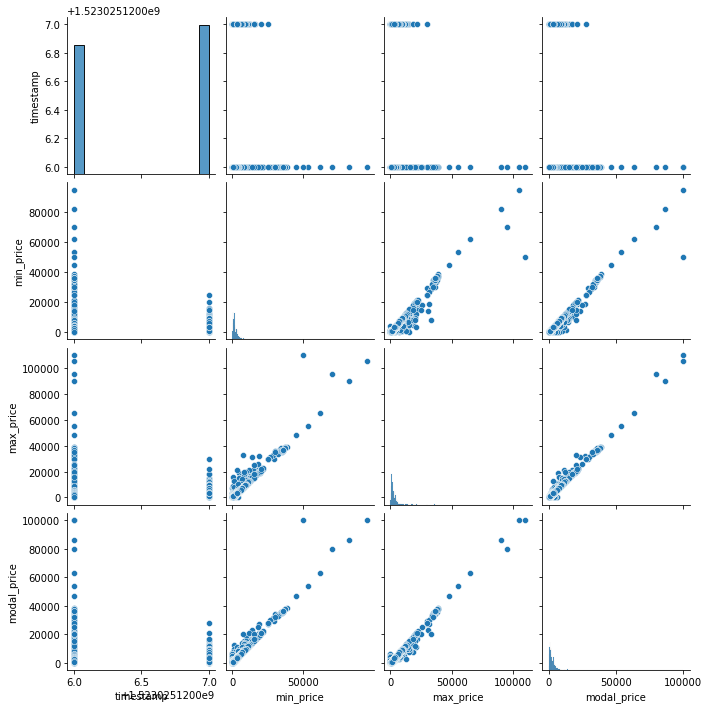

In [5]:
sns.pairplot(data)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7418 entries, 0 to 7417
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     7418 non-null   int64  
 1   state         7418 non-null   object 
 2   district      7418 non-null   object 
 3   market        7418 non-null   object 
 4   commodity     7418 non-null   object 
 5   variety       7418 non-null   object 
 6   arrival_date  7418 non-null   object 
 7   min_price     7418 non-null   float64
 8   max_price     7418 non-null   float64
 9   modal_price   7418 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 579.7+ KB


In [7]:
data.describe()

,timestamp,min_price,max_price,modal_price
count,7.418000e+03,7418.000000,7418.000000,7418.000000
mean,1.523025e+09,2551.547816,2999.163084,2804.140783
std,4.987461e-01,3563.042575,4199.273121,3917.043677
min,1.523025e+09,0.000000,0.000000,0.410000
25%,1.523025e+09,900.000000,1100.000000,1000.000000
50%,1.523025e+09,1650.000000,2000.000000,1828.500000
75%,1.523025e+09,3200.000000,3650.000000,3500.000000
max,1.523025e+09,95000.000000,110000.000000,100000.000000


In [8]:
data.columns

Index(['timestamp', 'state', 'district', 'market', 'commodity', 'variety',
       'arrival_date', 'min_price', 'max_price', 'modal_price'],
      dtype='object')

In [9]:
correlation_map = data[data.columns].corr()
correlation_map 

,timestamp,min_price,max_price,modal_price
timestamp,1.000000,-0.135984,-0.172347,-0.156164
min_price,-0.135984,1.000000,0.961513,0.979472
max_price,-0.172347,0.961513,1.000000,0.992559
modal_price,-0.156164,0.979472,0.992559,1.000000


<AxesSubplot:>

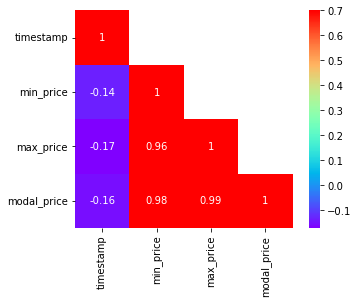

In [10]:
correlation_map = data[data.columns].corr()
obj = np.array(correlation_map)
obj[np.tril_indices_from(obj)] = False

sns.heatmap(correlation_map, mask=obj,vmax=.7, square=True,annot=True,cmap = "rainbow")

In [11]:
data.state.unique()

array(['Assam', 'Chattisgarh', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'NCT of Delhi', 'Orissa',
       'Pondicherry', 'Punjab', 'Rajasthan', 'Tamil Nadu', 'Telangana',
       'Tripura', 'Uttar Pradesh', 'Uttrakhand', 'West Bengal'],
      dtype=object)

In [12]:
data.state.nunique()

22

In [13]:
data.district.nunique()

348

In [14]:
data.district.unique()

array(['Barpeta', 'Dhemaji', 'Kamrup', 'Nagaon', 'Nalbari', 'Sonitpur',
       'Bastar', 'Bilaspur', 'Durg', 'Janjgir', 'Mahasamund',
       'North Bastar', 'Rajnandgaon', 'Surguja', 'Ahmedabad', 'Amreli',
       'Anand', 'Banaskanth', 'Bharuch', 'Bhavnagar', 'Dahod',
       'Gandhinagar', 'Jamnagar', 'Junagarh', 'Kheda', 'Mehsana', 'Morbi',
       'Panchmahals', 'Patan', 'Porbandar', 'Rajkot', 'Sabarkantha',
       'Surat', 'Surendranagar', 'Vadodara(Baroda)', 'Valsad', 'Ambala',
       'Bhiwani', 'Faridabad', 'Fatehabad', 'Jind', 'Kaithal', 'Karnal',
       'Kurukshetra', 'Mahendragarh-Narnaul', 'Panchkula', 'Rohtak',
       'Sirsa', 'Sonipat', 'Yamuna Nagar', 'Chamba', 'Hamirpur', 'Kangra',
       'Kullu', 'Mandi', 'Shimla', 'Sirmore', 'Solan', 'Una', 'Bokaro',
       'Dhanbad', 'East Singhbhum', 'Garhwa', 'Giridih', 'Godda', 'Gumla',
       'Koderma', 'Lohardaga', 'Pakur', 'Ranchi', 'Simdega', 'Bagalkot',
       'Bangalore', 'Belgaum', 'Bellary', 'Bidar', 'Bijapur',
       'Chamraj

In [15]:
data.commodity.nunique()

192

In [16]:
data.commodity.unique()

array(['Black Gram (Urd Beans)', 'Corriander seed', 'Jute',
       'Lentil(Masur)', 'Mustard', 'Potato', 'Wheat Atta', 'Maida Atta',
       'Green Chilli', 'Green Gram Dal (Moong Dal)', 'Paddy(Dhan)',
       'Bengal Gram(Gram)', 'Lak(Teora)', 'Onion', 'Tomato', 'Tinda',
       'Mahua', 'Bhindi(Ladies Finger)', 'Lemon', 'Maize', 'Bottle gourd',
       'Brinjal', 'Carrot', 'Methi(Leaves)', 'Cotton',
       'Bajra(Pearl Millet/Cumbu)', 'Castor Seed', 'Chili Red',
       'Cummin Seed(Jeera)', 'Jowar(Sorghum)', 'Methi Seeds',
       'Sesamum(Sesame,Gingelly,Til)', 'Wheat', 'Suva (Dill Seed)',
       'Rajgir', 'Soanf', 'Guar Seed(Cluster Beans Seed)',
       'Coriander(Leaves)', 'Ginger(Green)', 'Groundnut',
       'Arhar (Tur/Red Gram)', 'Beans', 'Soyabean', 'Barley (Jau)',
       'Green Gram (Moong)', 'Groundnut (Split)', 'Isabgul (Psyllium)',
       'Kulthi(Horse Gram)', 'Ground Nut Seed', 'Garlic', 'Cluster beans',
       'Cauliflower', 'Cucumbar(Kheera)', 'Pumpkin', 'Apple',
       'Bit

In [17]:
data.head()

,timestamp,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,1523025126,Assam,Barpeta,Bohorihat,Black Gram (Urd Beans),Black Gram (Whole),06/04/2018,2800.0,3000.0,2900.0
1,1523025126,Assam,Barpeta,Bohorihat,Corriander seed,Coriander Seed,06/04/2018,3500.0,4000.0,3825.0
2,1523025126,Assam,Barpeta,Bohorihat,Jute,TD-5,06/04/2018,3200.0,3875.0,3825.0
3,1523025126,Assam,Barpeta,Bohorihat,Lentil(Masur),Masoor Gola,06/04/2018,3400.0,3600.0,3500.0
4,1523025126,Assam,Barpeta,Bohorihat,Mustard,Mustard,06/04/2018,3550.0,3650.0,3600.0


In [18]:
def take_it(state , district , commodity):
    temp = data.loc[(data.state == state) & (data.district == district) & (data.commodity == commodity), : ]
    fig, axes = plt.subplots(6,1)
    fig.set_size_inches(10, 30)
    sns.barplot(data=temp ,y="min_price",x="market"  ,orient="v", ax = axes[0] )
    sns.pointplot(data=temp ,y="min_price",x="market" ,orient="v" , ax = axes[1] )
    sns.barplot(data=temp ,y="modal_price",x="market" ,orient="v" , ax = axes[2] )
    sns.pointplot(data=temp ,y="modal_price",x="market" ,orient="v" , ax = axes[3] )
    sns.barplot(data=temp ,y="max_price",x="market" ,orient="v" , ax = axes[4] )
    sns.pointplot(data=temp ,y="max_price",x="market" ,orient="v" , ax = axes[5] )

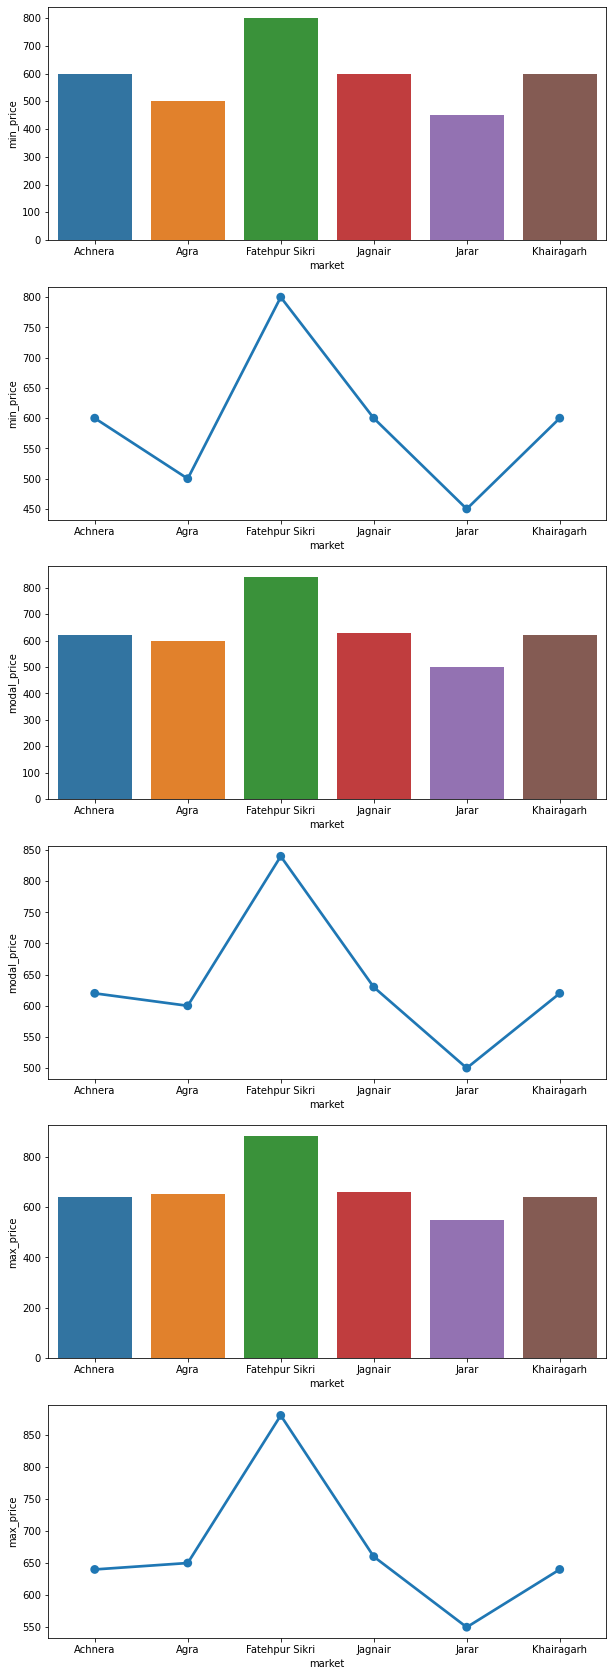

In [19]:
take_it("Uttar Pradesh","Agra","Brinjal")

In [20]:
data.head()

,timestamp,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,1523025126,Assam,Barpeta,Bohorihat,Black Gram (Urd Beans),Black Gram (Whole),06/04/2018,2800.0,3000.0,2900.0
1,1523025126,Assam,Barpeta,Bohorihat,Corriander seed,Coriander Seed,06/04/2018,3500.0,4000.0,3825.0
2,1523025126,Assam,Barpeta,Bohorihat,Jute,TD-5,06/04/2018,3200.0,3875.0,3825.0
3,1523025126,Assam,Barpeta,Bohorihat,Lentil(Masur),Masoor Gola,06/04/2018,3400.0,3600.0,3500.0
4,1523025126,Assam,Barpeta,Bohorihat,Mustard,Mustard,06/04/2018,3550.0,3650.0,3600.0


In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
label = LabelEncoder()


In [23]:
data["commodity"] = label.fit_transform(data["commodity"])
data["variety"] = label.fit_transform(data["variety"])


In [24]:
data.head()

,timestamp,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,1523025126,Assam,Barpeta,Bohorihat,21,52,06/04/2018,2800.0,3000.0,2900.0
1,1523025126,Assam,Barpeta,Bohorihat,50,86,06/04/2018,3500.0,4000.0,3825.0
2,1523025126,Assam,Barpeta,Bohorihat,93,312,06/04/2018,3200.0,3875.0,3825.0
3,1523025126,Assam,Barpeta,Bohorihat,102,207,06/04/2018,3400.0,3600.0,3500.0
4,1523025126,Assam,Barpeta,Bohorihat,125,221,06/04/2018,3550.0,3650.0,3600.0


In [25]:
X = data.iloc[:,[4,5,7,8]]
y = data.iloc[:,9]

In [29]:
X.head()

,commodity,variety,min_price,max_price
0,21,52,2800.0,3000.0
1,50,86,3500.0,4000.0
2,93,312,3200.0,3875.0
3,102,207,3400.0,3600.0
4,125,221,3550.0,3650.0


In [30]:
y.head()

0    2900.0
1    3825.0
2    3825.0
3    3500.0
4    3600.0
Name: modal_price, dtype: float64

In [32]:
X.loc[1692]

commodity      41.0
variety        78.0
min_price    3000.0
max_price    3800.0
Name: 1692, dtype: float64

In [33]:
y.loc[1692]

3400.0

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 1,test_size =0.2 )

In [36]:
#MODEL

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
lg = LinearRegression()

In [40]:
lg.fit(X_train,y_train)

LinearRegression()

In [41]:
y_pred = lg.predict(X_test)

In [44]:
y_pred

array([3489.39790971, 6716.12259556, 2191.43022183, ..., 2193.03639206,
       3598.82193142, 4266.78503184])

In [45]:
# evaluation

In [47]:
from sklearn.metrics import r2_score

In [50]:
r2_score(y_pred,y_test)

0.992368576835764

In [59]:
from sklearn.metrics import mean_squared_error
from math import sqrt 

In [60]:
rmse = sqrt(mean_squared_error(y_pred,y_test))

In [61]:
rmse

334.5344891116704